In [1]:
#............................................Training & Testing using deep learning......................................#
import os
import cv2
import time
import numpy as np
from keras.layers import Conv2D 
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.models import Sequential, save_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings(action = 'ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
path = 'Preprocessed/'

In [10]:
gestures = os.listdir(path)

In [11]:
gestures

['normal', 'umpire']

In [12]:
dict_labels = {
    'normal': 1,
    'umpire': 2
    
    
}

In [13]:
print(list(dict_labels.keys()))

['normal', 'umpire']


In [15]:
x, y = [], []
for ix in gestures:
    images = os.listdir(path + ix)
    for cx in images:
        img_path = path + ix + '/' + cx
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels[ix])

In [16]:
X = np.array(x)
Y = np.array(y)
print(Y)
Y = np_utils.to_categorical(Y)
print(Y)
print(type(Y),len(Y))
Y.shape

[1 1 1 ... 2 2 2]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
<class 'numpy.ndarray'> 5196


(5196, 3)

In [17]:
Y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

<AxesSubplot:ylabel='count'>

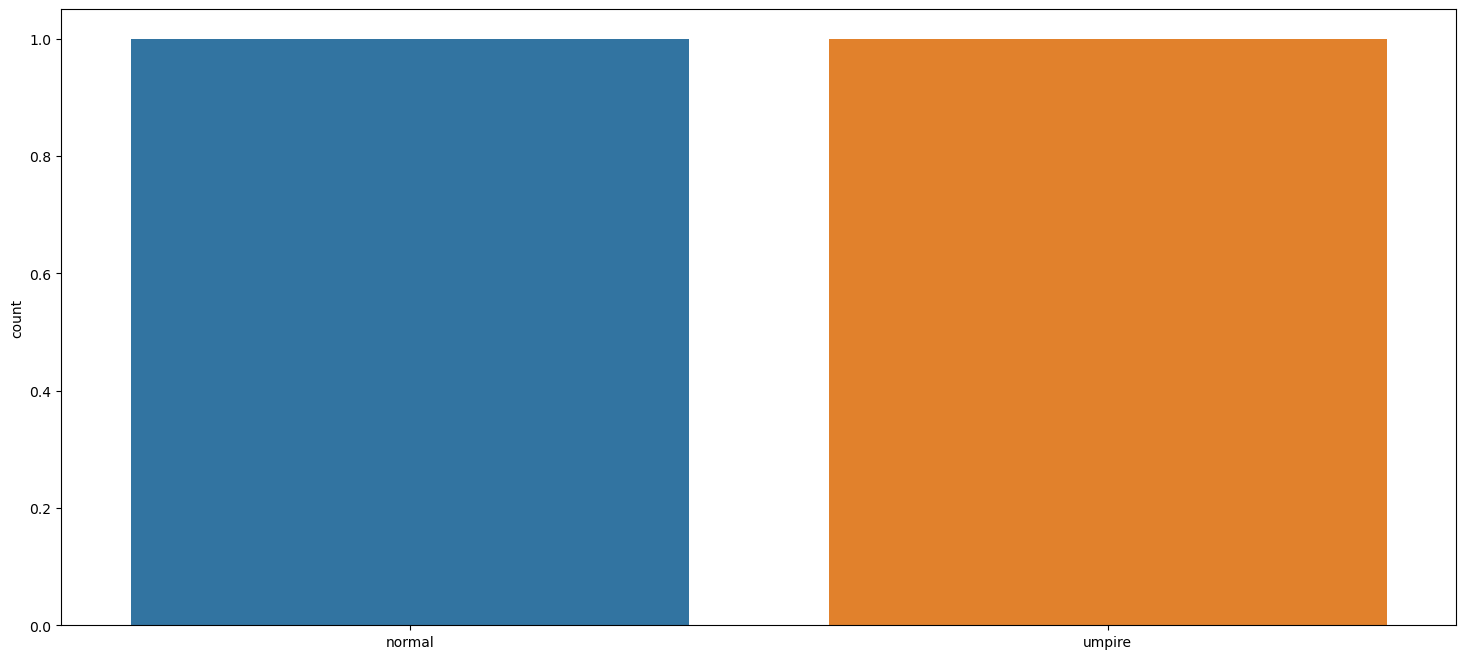

In [18]:
plt.figure(figsize = (18,8))
sns.countplot(x=list(dict_labels.keys()))

In [19]:
Y.shape

(5196, 3)

In [20]:
categories = Y.shape[1]

In [21]:
X, Y = shuffle(X, Y, random_state=0)

In [22]:
X.shape

(5196, 50, 50, 1)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [24]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(3637, 50, 50, 1) (1559, 50, 50, 1)
(3637, 3) (1559, 3)


In [25]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(50,50 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(categories, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [26]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [27]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=[X_test, Y_test])

Epoch 1/50
29/29 [==============================] - 5s 132ms/step - loss: 0.1711 - accuracy: 0.9379 - val_loss: 2.7316e-06 - val_accuracy: 1.0000
Epoch 2/50
29/29 [==============================] - 4s 131ms/step - loss: 8.2718e-05 - accuracy: 1.0000 - val_loss: 2.0645e-07 - val_accuracy: 1.0000
Epoch 3/50
29/29 [==============================] - 4s 128ms/step - loss: 2.6869e-06 - accuracy: 1.0000 - val_loss: 9.4052e-08 - val_accuracy: 1.0000
Epoch 4/50
29/29 [==============================] - 4s 129ms/step - loss: 1.3834e-06 - accuracy: 1.0000 - val_loss: 5.5972e-08 - val_accuracy: 1.0000
Epoch 5/50
29/29 [==============================] - 4s 130ms/step - loss: 4.3711e-06 - accuracy: 1.0000 - val_loss: 2.2481e-08 - val_accuracy: 1.0000
Epoch 6/50
29/29 [==============================] - 4s 132ms/step - loss: 4.0216e-06 - accuracy: 1.0000 - val_loss: 2.7680e-08 - val_accuracy: 1.0000
Epoch 7/50
29/29 [==============================] - 4s 132ms/step - loss: 6.6700e-07 - accuracy: 1.0000 

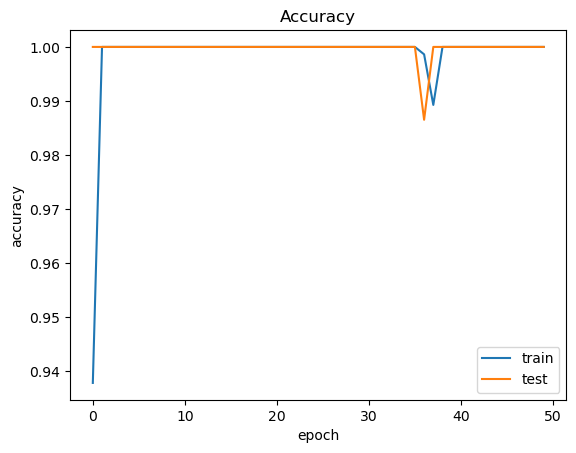

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [29]:
model.save('CNN_modelu.h5')

In [30]:
m = load_model('CNN_modelu.h5')

In [37]:
test_data = os.listdir('Test/')

In [38]:
dict_labels

{'normal': 1, 'umpire': 2}

In [48]:
for ix in test_data:
    print(ix)

normal
umpire


In [50]:
x, y = [], []
for ix in test_data:
    images = os.listdir('Test/' + ix)
    print('images',images)
    for cx in images:
        img_path = 'Test/' + ix + '/' + str(cx) 
        print(img_path)
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels[ix])

images ['2023-04-06 12-08-29.240.jpg', '2023-04-06 12-08-29.450.jpg', '2023-04-06 12-08-29.507.jpg', '2023-04-06 12-08-29.509.jpg', '2023-04-06 12-08-29.547.jpg', '2023-04-06 12-08-29.613.jpg', '2023-04-06 12-08-29.675.jpg', '2023-04-06 12-08-29.688.jpg', '2023-04-06 12-08-29.772.jpg', '2023-04-06 12-08-29.905.jpg', '2023-04-06 12-08-29.979.jpg', '2023-04-06 12-08-30.007.jpg']
Test/normal/2023-04-06 12-08-29.240.jpg
Test/normal/2023-04-06 12-08-29.450.jpg
Test/normal/2023-04-06 12-08-29.507.jpg
Test/normal/2023-04-06 12-08-29.509.jpg
Test/normal/2023-04-06 12-08-29.547.jpg
Test/normal/2023-04-06 12-08-29.613.jpg
Test/normal/2023-04-06 12-08-29.675.jpg
Test/normal/2023-04-06 12-08-29.688.jpg
Test/normal/2023-04-06 12-08-29.772.jpg
Test/normal/2023-04-06 12-08-29.905.jpg
Test/normal/2023-04-06 12-08-29.979.jpg
Test/normal/2023-04-06 12-08-30.007.jpg
images ['2023-04-06 11-38-08.679.jpg', '2023-04-06 11-38-08.898.jpg', '2023-04-06 11-38-09.109.jpg', '2023-04-06 11-38-09.163.jpg', '2023-04

In [51]:
X_t = np.array(x)
y_t = np.array(y)
Y_t = np_utils.to_categorical(y_t)

In [52]:
X_t.shape

(24, 50, 50, 1)

In [53]:
y_pred = m.predict(X_t)

1/1 [==============================] - 0s 94ms/step


In [54]:
acc = accuracy_score(Y_t, y_pred.round())
print('Accuracy:', acc)

Accuracy: 1.0


In [55]:
print(classification_report(y_pred.round(), Y_t))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00        24
   macro avg       0.67      0.67      0.67        24
weighted avg       1.00      1.00      1.00        24
 samples avg       1.00      1.00      1.00        24

